In [1]:
## Import any packages I may need
import pylcp
import matplotlib.pyplot as plt
import numpy as np
import qutip

In [7]:
## Let's create some basic functions that will be needed for this MC:

In [5]:
def update_pos(v, x, dt):
    ## update the position of particle given its velocity 
    ## for a timestep of length dt
    # v is a 3X1 numpy array with entries vx, vy, vz, same for x.
    x_new=np.zeros([1,3])
    x_new=x+v*dt
    return x_new

def update_v(F,v,dt):
    ## use Newtons law to update the velocity of a particle given the force 
    ## for a timestep of length dt
    # F is a 3X1 numpy array with entries Fx, Fy, Fz, same for v.
    m=171 #we aure using the 171 isotope of Yb, in any case for the simple harmonic oscillator it doesnt matter, but I take Da as the convention for mass
    v_new=dt*F/m+v #1st order finite difference for newtons laws
    return v_new


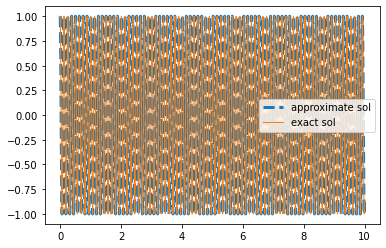

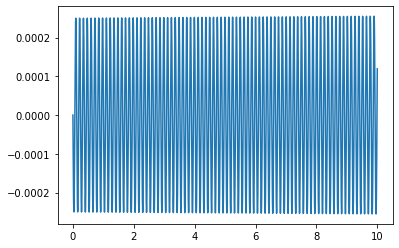

In [105]:
## our optical Lattice is approximatly a harmonic oscillator
#lets make sure we can reproduce the analytical harmonic oscillator result for one particle using our Monte-Carlo

N=1000000 #number timesteps
t_init=0
t_final=10
time_steps=np.linspace(t_init,t_final,N)
dt= time_steps[2]-time_steps[1]

x=np.zeros([N,3]) #initialize array of 3d positions for the particle
v=np.zeros([N,3]) #initialize array of 3d positions for the particle
x[0,0]=1
m=171
w=50
for i in range(1,N):
    F=np.zeros([1,3])
    F[0,0]=-m*w**2*x[i-1,0] #make the force only in the x dir
    v[i]=update_v(F,v[i-1],dt)
    x[i]=update_pos(v[i],x[i-1],dt)

analytical_sol=x[0,0]*np.cos(w*time_steps)
plt.plot(time_steps,x[:,0],label="approximate sol",linestyle= "--",linewidth=3)
plt.plot(time_steps, analytical_sol, label="exact sol",linewidth=1)
plt.legend()
plt.show()
# these should match well

#since this is a type of symplectic intergrator we should also see the error bounded-+
plt.plot(time_steps,x[:,0]-analytical_sol)

#we should also assert that the results are good to 1e-3
np.testing.assert_allclose(x[:,0],analytical_sol,atol=10**(-3))

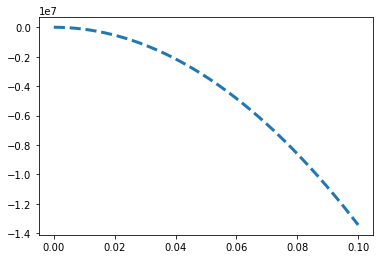

In [14]:
#Fantastic, it works!
#Lets use some real numbers and see oscillation of atoms in our optical lattice, 
#1st set up the constants


t_radial=50 #50Hz radial trapping frequency
t_long=1500 #1500Hz longitudinal trapping frequency
N=1000000 #number timesteps
t_init=0
t_final=0.1 #evolve for 1 tenth of a second
time_steps=np.linspace(t_init,t_final,N)
dt= time_steps[2]-time_steps[1]

x=np.zeros([N,3]) #initialize array of 3d positions for the particle
v=np.zeros([N,3]) #initialize array of 3d positions for the particle

m=171
w_x=t_radial*2*np.pi #angular frequency of x and y trapping frequency
w_y=w_x
w_z=t_long*2*np.pi # angular trapping frequency for z
k=2*np.pi/759 #wavenumber of the optical lattice (using nm as the conventional length)


C:\Users\jacob\miniconda3\envs\phys5070\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


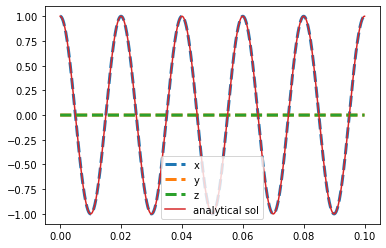

In [19]:
## 1st test: release the atom at x=1nm, z=0nm, it should just undergo simple harmonic motion in x, y and z should be still at 0nm

x[0,0]=1
x[0,1]=0
x[0,2]=0
for i in range(1,N):
    F=np.zeros([1,3])
    F[0,0]=-m*w_x**2*np.cos(k*x[i-1,2])**2*x[i-1,0] #F_x
    F[0,1]=-m*w_y**2*np.cos(k*x[i-1,2])**2*x[i-1,1] #F_y
    F[0,2]=-m*w_z**2/(2*k)*np.sin(2*k*x[i-1,2])**2 #F_z
    v[i]=update_v(F,v[i-1],dt)
    x[i]=update_pos(v[i],x[i-1],dt)

analytical_sol=x[0,0]*np.cos(w_x*time_steps)
plt.plot(time_steps,x[:,0],label="x",linestyle= "--",linewidth=3)
plt.plot(time_steps,x[:,1], label="y",linestyle= "--",linewidth=3)
plt.plot(time_steps,x[:,2], label="z",linestyle= "--",linewidth=3)
plt.plot(time_steps,analytical_sol, label="analytical sol")
plt.legend()


C:\Users\jacob\miniconda3\envs\phys5070\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


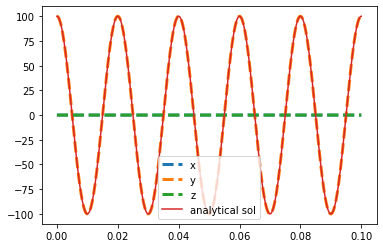

In [21]:
## 2nd test: release the atom at y=100nm, z=pi/knm, it should just undergo simple harmonic motion in y, x and z should be still at 0nm

x[0,0]=0
x[0,1]=100
x[0,2]=0
for i in range(1,N):
    F=np.zeros([1,3])
    F[0,0]=-m*w_x**2*np.cos(k*x[i-1,2])**2*x[i-1,0] #F_x
    F[0,1]=-m*w_y**2*np.cos(k*x[i-1,2])**2*x[i-1,1] #F_y
    F[0,2]=-m*w_z**2/(2*k)*np.sin(2*k*x[i-1,2])**2 #F_z
    v[i]=update_v(F,v[i-1],dt)
    x[i]=update_pos(v[i],x[i-1],dt)

analytical_sol=x[0,1]*np.cos(w_x*time_steps)
plt.plot(time_steps,x[:,0],label="x",linestyle= "--",linewidth=3)
plt.plot(time_steps,x[:,1], label="y",linestyle= "--",linewidth=3)
plt.plot(time_steps,x[:,2], label="z",linestyle= "--",linewidth=3)
plt.plot(time_steps,analytical_sol, label="analytical sol")
plt.legend()

C:\Users\jacob\miniconda3\envs\phys5070\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


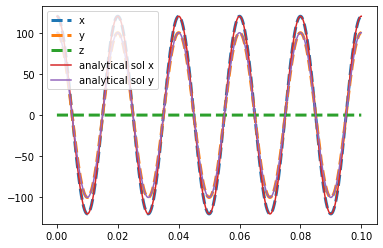

In [22]:
## 3rd test: release the atom at x=100nm, y=100nm, z=0, it should just undergo simple harmonic motion in x and y
#independently since x and y are uncoupled. z stays at 0.
x[0,0]=120
x[0,1]=100
x[0,2]=0
for i in range(1,N):
    F=np.zeros([1,3])
    F[0,0]=-m*w_x**2*np.cos(k*x[i-1,2])**2*x[i-1,0] #F_x
    F[0,1]=-m*w_y**2*np.cos(k*x[i-1,2])**2*x[i-1,1] #F_y
    F[0,2]=-m*w_z**2/(2*k)*np.sin(2*k*x[i-1,2])**2 #F_z
    v[i]=update_v(F,v[i-1],dt)
    x[i]=update_pos(v[i],x[i-1],dt)

analytical_sol_x=x[0,0]*np.cos(w_x*time_steps)
analytical_sol_y=x[0,1]*np.cos(w_y*time_steps)
plt.plot(time_steps,x[:,0],label="x",linestyle= "--",linewidth=3)
plt.plot(time_steps,x[:,1], label="y",linestyle= "--",linewidth=3)
plt.plot(time_steps,x[:,2], label="z",linestyle= "--",linewidth=3)
plt.plot(time_steps,analytical_sol_x, label="analytical sol x")
plt.plot(time_steps,analytical_sol_y, label="analytical sol y")
plt.legend()

In [ ]:
# We don't need to test z because we don't care about z motion;
#we are in the lamb-dicke regime in z so recoils and spontaneous emisisons don't affect dynamics.
#In addition we are in the resolved sideband regime, so a classical simulation couldn't hope to 
#get the correct results here. 

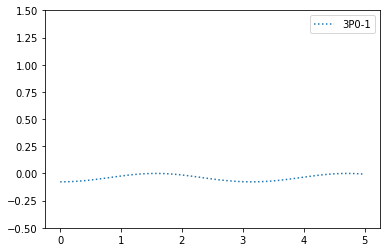

In [117]:
def dressed_state_3P0_1_energy(pos, pol, Omega_clock, delta_clock, Omega_1388, delta_1388):
    ### Returns the Energy of the 1st dressed state of 3P0 at a specific position, for a specific polarization
    #comes from the mathmatica notebook
    hbar=1
    E=-hbar/6*(-3*delta_1388+np.sqrt(9*delta_1388**2+3*((pol[1](pos[2]))**2+(pol[0](pos[2]))**2+(pol[2](pos[2]))**2)*Omega_clock**2-3*(np.sqrt(((pol[0](pos[2]))**2+(pol[1](pos[2])**2)*(((pol[0](pos[2]))**2-(pol[1](pos[2]))**2)+2*(pol[2](pos[2]))**2)*Omega_1388**4)))))
    return E

def dressed_state_3P0_2_energy(pos, pol, Omega_clock, delta_clock, Omega_1388, delta_1388):
    ### Returns the Energy of the 2nd dressed state of 3P0 at a specific position, for a specific polarization
    #comes from the mathmatica notebook
    hbar=1
    E=hbar/6*(3*delta_1388+np.sqrt(9*delta_1388**2+3*((pol[1](pos[2]))**2+(pol[0](pos[2]))**2+(pol[2](pos[2]))**2)*Omega_clock**2-3*(np.sqrt(((pol[0](pos[2]))**2+(pol[1](pos[2])**2)*(((pol[0](pos[2]))**2-(pol[1](pos[2]))**2)+2*(pol[2](pos[2]))**2)*Omega_1388**4)))))
    return E

def dressed_state_3D1_1_energy(pos, pol, Omega_clock, delta_clock, Omega_1388, delta_1388):
    ### Returns the Energy of the 2nd dressed state of 3P0 at a specific position, for a specific polarization
    #comes from the mathmatica notebook
    hbar=1
    E=-hbar/6*(-3*delta_1388+np.sqrt(3)*np.sqrt(3*delta_1388**2+((pol[1](pos[2]))**2+(pol[0](pos[2]))**2+(pol[2](pos[2]))**2)*Omega_clock**2+(np.sqrt(((pol[0](pos[2]))**2+(pol[1](pos[2])**2)*(((pol[0](pos[2]))**2-(pol[1](pos[2]))**2)+2*(pol[2](pos[2]))**2)*Omega_1388**4)))))
    return E

def dressed_state_3D1_2_energy(pos, pol, Omega_clock, delta_clock, Omega_1388, delta_1388):
    ### Returns the Energy of the 2nd dressed state of 3P0 at a specific position, for a specific polarization
    #comes from the mathmatica notebook
    hbar=1
    E=hbar/6*(3*delta_1388+np.sqrt(9*delta_1388**2+3*((pol[1](pos[2]))**2+(pol[0](pos[2]))**2+(pol[2](pos[2]))**2)*Omega_clock**2+3*(np.sqrt(((pol[0](pos[2]))**2+(pol[1](pos[2])**2)*(((pol[0](pos[2]))**2-(pol[1](pos[2]))**2)+2*(pol[2](pos[2]))**2)*Omega_1388**4)))))
    return E

pol = np.array([lambda z: 0,lambda z: 0,lambda z: np.cos(z)])
N=100
pos=[0,0,0]
E2=np.zeros(N)
E1=np.zeros(N)
E3=np.zeros(N)
E4=np.zeros(N)
ii = np.linspace(0,5,N)
j=0
for i in ii:
    
    pos[2]=i
    E1[j]=dressed_state_3P0_1_energy(pos, pol, 1.0,0,1.0,1.0)
    E2[j]=dressed_state_3P0_2_energy(pos, pol, 1.0,0,1.0,1.0)
    E3[j]=dressed_state_3D1_2_energy(pos, pol, 1.0,0,1.0,1.0)
    E4[j]=dressed_state_3D1_2_energy(pos, pol, 1.0,0,1.0,1.0)
    j+=1
plt.plot(ii,E1,label='3P0-1',linestyle='dotted')
#plt.plot(ii,E2,label='3P0-2',linestyle='dotted')
#plt.plot(ii,E3,label='3D1-1',linestyle='--')
#plt.plot(ii,E4,label='3D1-2',linestyle='--')
plt.ylim([-0.5,1.5])
plt.legend()
plt.show()

In [ ]:
## Now we will do the most naieve thing possible for the internal state of the atom.
# Assume it is always in an Eigenstate (dressed state) and transfer the atom between states based on 1/Rabi Frequeny,
#or 1/ spontaneous decay time.

def update_internal_state(dr, internal_state, Omega_clock, delta_clock, Omega_1388, delta_1388, pos, pol,optical_pumping=0)
    ###  Updates the internal state of the atom according to spontaneous decay and rabi frequency probabilities
    # dt is the time interval used for the MC, we assume it is small compared to any rabi or spontaneous decay timescale
    # internal_state is a 5 entry vector: 
    # 0: GS
    # 1: 3P0 dressed state #1
    # 2: 3P0 dressed state #2 (these states mix only 3P0)
    # 3: 3D1 dressed state #1
    # 4: 3D1 dressed state #2 (these states mix only 3D1)
    # a True represents the atom is in the state, a 0 means it is not in that state
    #Omega and delta are the bare rabi frequency and detuning from resonance respectivly. 
    # pos is a 3 entry vector for the x,y,z position of the atom
    # pol is a 3 entry vector, where each entry is a function of z specifying the intensity of the polarization 
    # at that location, normalized to 1. x,y dependeancies are ignored because we are assuming infinite plane waves,
    # not gaussian beams. Order sigma_+, sigma_minus, sigma_pi.
    # Optical pumping: 0= random mix of mF=+-1/2 in 1S0. 1/2= all atoms in mF=1/2, -1/2=all atoms in mF=-1/2

    sp_decay_flag = False #did we spontaneously decay from 3D1 to 1S0
    sisy_absorb_flag= False #did we absorb a 1388nm photon transitioning from 3P0 to 3D1.
    
    
    #First do spontaneous decay
    T_3D1 =329*10^(-9) #decay time 3D1 to 1S0
    if internal_state[3]:
        rand=np.random.uniform()
        if rand < 1-exp(dt/T_3D1): #This is the integral of an exponential probability distribution from 0 to dt
        #to get the total probability of decay within time dt.
            internal_state = np.roll(internal_state,2)
            sp_decay_flag = True
            return internal_state, sp_decay_flag, sisy_absorb_flag
    if internal_state[4]:
        rand=np.random.uniform()
        if rand < 1-exp(dt/T_3D1): #This is the integral of an exponential probability distribution from 0 to dt
        #to get the total probability of decay within time dt.
            internal_state = np.roll(internal_state,1)
            sp_decay_flag = True
            return internal_state, sp_decay_flag, sisy_absorb_flag
        
    #Now do rabi excitation on the clock transition: 1S0 to 3P0
    if internal_state[0]:
        rand=np.random.uniform()
        